<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


In [1]:
# !pip install pyspark==3.1.2 -q
# !pip install findspark -q

In [2]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-SN0101EN-SkillsNetwork/labs/Week2_FSDS/washing.parquet
# !mv washing.parquet?raw=true washing.parquet

--2024-06-12 11:22:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-SN0101EN-SkillsNetwork/labs/Week2_FSDS/washing.parquet
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112048 (109K) [binary/octet-stream]
Saving to: 'washing.parquet'

     0K .......... .......... .......... .......... .......... 45%  776K 0s
    50K .......... .......... .......... .......... .......... 91% 1.02M 0s
   100K .........                                             100% 30.8M=0.1s

2024-06-12 11:22:26 (970 KB/s) - 'washing.parquet' saved [112048/112048]

"mv" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable

In [3]:
import findspark
findspark.init()

In [4]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [5]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [8]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     NULL|      77| NULL|        100|1547808723923|   NULL|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    NULL|      NULL|     NULL|    NULL| 1046|       NULL|1547808729917|   NULL|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    NULL|      NULL|       71|    NULL| NULL|       NULL|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     NULL|      75| NULL|         86|1547808738999|   NULL|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    NULL|      NULL|       75|    NULL| NULL|   

In [11]:
result = spark.sql("select voltage from washing where voltage is not null")
# result.collect() #We get Row objects when only doing the query above, we gotta go to the rdd and map it so we only get the values
result.rdd.map(lambda row : row.voltage).take(10)

[236, 235, 228, 236, 233, 226, 235, 220, 225, 239]

In [12]:
result_array = result.rdd.map(lambda row : row.voltage).sample(False,0.1).collect()
result_array

[244,
 227,
 237,
 223,
 231,
 234,
 228,
 231,
 238,
 250,
 232,
 244,
 236,
 221,
 232,
 231,
 238,
 253,
 232,
 227,
 247,
 230,
 221,
 246,
 220,
 236,
 221,
 220,
 237,
 230,
 239,
 221,
 234,
 228,
 228,
 226,
 221,
 234,
 235,
 239,
 239,
 236,
 229,
 226,
 231,
 224,
 236,
 228,
 239,
 235,
 228,
 224]

In [14]:
%matplotlib inline 
#This tells the environment to display all plots created by matplotlib as images under the cell

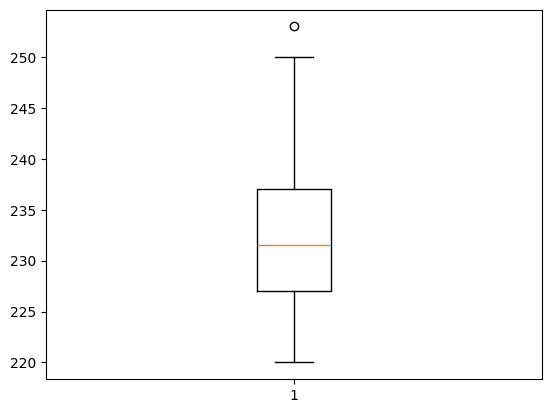

In [15]:
import matplotlib.pyplot as plt
plt.boxplot(result_array)
plt.show()

In [ ]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda row: row[0]).collect()
result_array_voltage = result_rdd.map(lambda row: row[1]).collect()

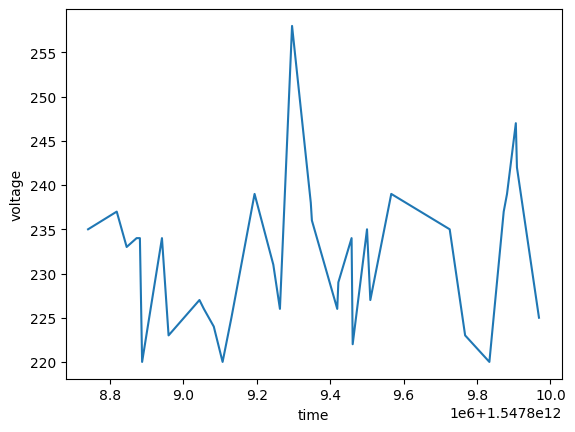

In [23]:
plt.plot(result_array_ts, result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [24]:
result_df = spark.sql("select hardness, temperature, flowrate from washing where hardness is not null and flowrate is not null and temperature is not null")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda row: row[0]).collect()
result_array_temperature = result_rdd.map(lambda row: row[1]).collect()
result_array_flowrate = result_rdd.map(lambda row: row[2]).collect()

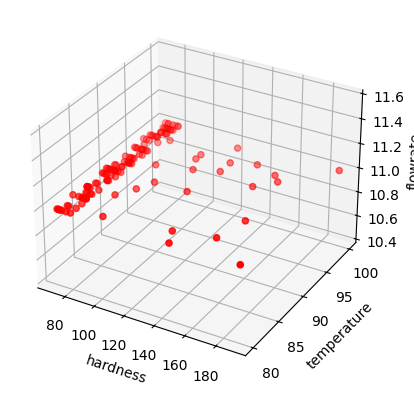

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate,c="r",marker="o")

ax.set_xlabel("hardness")
ax.set_ylabel("temperature")
ax.set_zlabel("flowrate")

plt.show()

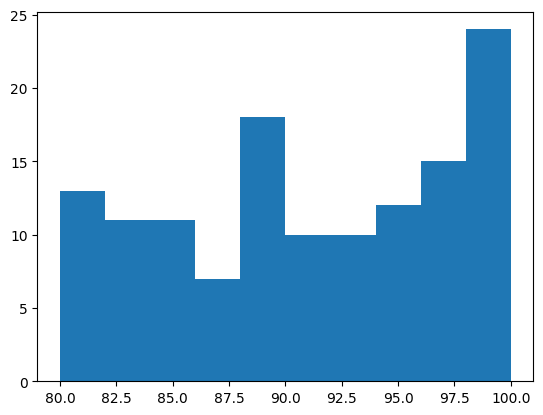

In [29]:
plt.hist(result_array_temperature)
plt.show()